In [1]:
import random

# Define card values
card_values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def value(self):
        return card_values[self.rank]

    def __str__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.cards = []
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        for _ in range(num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit, rank))
        random.shuffle(self.cards)

    def deal_card(self):
        if len(self.cards) == 0:
            self.__init__()  # reshuffle if no cards left
        return self.cards.pop()

class Hand:
    def __init__(self):
        self.cards = []
        self.total = 0

    def add_card(self, card):
        self.cards.append(card)
        self.update_hand_value()

    def update_hand_value(self):
        self.total = sum(card.value() for card in self.cards)
        ace_count = len([card for card in self.cards if card.rank == 'A'])

        # Adjust for aces if total is over 21
        while self.total > 21 and ace_count:
            self.total -= 10  # count ace as 1 instead of 11
            ace_count -= 1

    def is_bust(self):
        return self.total > 21

    def __str__(self):
        return ', '.join(str(card) for card in self.cards)

class Player:
    def __init__(self, name="Player"):
        self.name = name
        self.hand = Hand()

    def hit(self, deck):
        self.hand.add_card(deck.deal_card())

    def is_bust(self):
        return self.hand.is_bust()

    def hand_value(self):
        return self.hand.total

    def __str__(self):
        return f"{self.name}'s hand: {self.hand} (value: {self.hand_value()})"

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer")

    def play(self, deck):
        # Dealer must hit until the hand total is 17 or more
        while self.hand_value() < 17:
            self.hit(deck)

class Game:
    def __init__(self, strategies, num_rounds=50):
        self.deck = Deck()
        self.dealer = Dealer()
        self.players = [Player(f"Player {i+1}") for i in range(len(strategies))]
        self.strategies = strategies
        self.num_rounds = num_rounds

    def play_round(self):
        # Deal initial two cards to dealer and players
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()

        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)

        # Players' turns based on strategies
        for i, player in enumerate(self.players):
            self.execute_strategy(player, self.strategies[i])

        # Dealer's turn
        self.dealer.play(self.deck)

        # Evaluate results
        return self.evaluate_round()

    def execute_strategy(self, player, strategy):
        if strategy == 'conservative':
            while player.hand_value() < 12:
                player.hit(self.deck)
        elif strategy == 'aggressive':
            while player.hand_value() < 17:
                player.hit(self.deck)

    def evaluate_round(self):
        dealer_total = self.dealer.hand_value()
        results = {}

        for player in self.players:
            if player.is_bust():
                results[player.name] = "Loss"
            elif dealer_total > 21 or player.hand_value() > dealer_total:
                results[player.name] = "Win"
            elif player.hand_value() == dealer_total:
                results[player.name] = "Push"
            else:
                results[player.name] = "Loss"

        return results

    def play(self):
        win_counts = {player.name: 0 for player in self.players}
        for _ in range(self.num_rounds):
            result = self.play_round()
            for player, outcome in result.items():
                if outcome == "Win":
                    win_counts[player] += 1

        return win_counts

# Example usage
strategies = ['conservative', 'aggressive', 'conservative']
game = Game(strategies)
win_counts = game.play()
print(win_counts)

{'Player 1': 27, 'Player 2': 23, 'Player 3': 28}


In [2]:
import random
import numpy as np

# Define card values
card_values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def value(self):
        return card_values[self.rank]

    def __str__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.cards = []
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        for _ in range(num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit, rank))
        random.shuffle(self.cards)

    def deal_card(self):
        if len(self.cards) == 0:
            self.__init__()  # reshuffle if no cards left
        return self.cards.pop()

class Hand:
    def __init__(self):
        self.cards = []
        self.total = 0

    def add_card(self, card):
        self.cards.append(card)
        self.update_hand_value()

    def update_hand_value(self):
        self.total = sum(card.value() for card in self.cards)
        ace_count = len([card for card in self.cards if card.rank == 'A'])

        # Adjust for aces if total is over 21
        while self.total > 21 and ace_count:
            self.total -= 10  # count ace as 1 instead of 11
            ace_count -= 1

    def is_bust(self):
        return self.total > 21

    def __str__(self):
        return ', '.join(str(card) for card in self.cards)

class Player:
    def __init__(self, name="Player", chips=100):
        self.name = name
        self.hand = Hand()
        self.chips = chips

    def hit(self, deck):
        self.hand.add_card(deck.deal_card())

    def is_bust(self):
        return self.hand.is_bust()

    def hand_value(self):
        return self.hand.total

    def adjust_chips(self, amount):
        self.chips += amount

    def __str__(self):
        return f"{self.name}'s hand: {self.hand} (value: {self.hand_value()}) | Chips: {self.chips}"

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0)

    def play(self, deck):
        # Dealer must hit until the hand total is 17 or more
        while self.hand_value() < 17:
            self.hit(deck)

class Game:
    def __init__(self, strategies, num_rounds=50):
        self.deck = Deck()
        self.dealer = Dealer()
        self.players = [Player(f"Player {i+1}") for i in range(len(strategies))]
        self.strategies = strategies
        self.num_rounds = num_rounds

    def play_round(self):
        # Deal initial two cards to dealer and players
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()

        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)

        # Players' turns based on strategies
        for i, player in enumerate(self.players):
            self.execute_strategy(player, self.strategies[i])

        # Dealer's turn
        self.dealer.play(self.deck)

        # Evaluate results
        return self.evaluate_round()

    def execute_strategy(self, player, strategy):
        if strategy == 'conservative':
            while player.hand_value() < 12:
                player.hit(self.deck)
        elif strategy == 'aggressive':
            while player.hand_value() < 17:
                player.hit(self.deck)

    def evaluate_round(self):
        dealer_total = self.dealer.hand_value()
        results = {}

        for player in self.players:
            if player.is_bust():
                player.adjust_chips(-10)  # Losing bet
                results[player.name] = "Loss"
            elif dealer_total > 21 or player.hand_value() > dealer_total:
                player.adjust_chips(10)  # Winning bet
                results[player.name] = "Win"
            elif player.hand_value() == dealer_total:
                results[player.name] = "Push"
            else:
                player.adjust_chips(-10)  # Losing bet
                results[player.name] = "Loss"

        return results

    def play(self):
        win_counts = {player.name: 0 for player in self.players}
        total_chips = {player.name: [] for player in self.players}

        for _ in range(self.num_rounds):
            result = self.play_round()
            for player, outcome in result.items():
                if outcome == "Win":
                    win_counts[player] += 1
                total_chips[player].append(self.get_player_by_name(player).chips)

        return win_counts, total_chips

    def get_player_by_name(self, name):
        for player in self.players:
            if player.name == name:
                return player

    def calculate_statistics(self, total_chips):
        stats = {}
        for player, chips_list in total_chips.items():
            chips_array = np.array(chips_list)
            avg_winnings = np.mean(chips_array)
            std_dev = np.std(chips_array)
            stats[player] = {'average_winnings': avg_winnings, 'std_dev': std_dev}
        return stats

# Example usage
strategies = ['conservative', 'aggressive', 'conservative']
game = Game(strategies, num_rounds=50)
win_counts, total_chips = game.play()

# Calculate statistics
statistics = game.calculate_statistics(total_chips)

print("Win counts:", win_counts)
print("Statistics (Average Winnings and Std Dev):", statistics)


Win counts: {'Player 1': 19, 'Player 2': 29, 'Player 3': 21}
Statistics (Average Winnings and Std Dev): {'Player 1': {'average_winnings': 35.4, 'std_dev': 31.061873736141546}, 'Player 2': {'average_winnings': 144.8, 'std_dev': 25.23806648695577}, 'Player 3': {'average_winnings': 60.8, 'std_dev': 23.81931988953505}}


In [3]:
import random
import numpy as np

# Define card values
card_values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, 'J': 10, 'Q': 10, 'K': 10, 'A': 11}
card_count_values = {'2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 0, '8': 0, '9': 0, '10': -1, 'J': -1, 'Q': -1, 'K': -1, 'A': -1}

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def value(self):
        return card_values[self.rank]

    def count_value(self):
        return card_count_values[self.rank]

    def __str__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.cards = []
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        for _ in range(num_decks):
            for suit in suits:
                for rank in ranks:
                    self.cards.append(Card(suit, rank))
        random.shuffle(self.cards)
        self.running_count = 0  # Track card count

    def deal_card(self):
        if len(self.cards) == 0:
            self.__init__()  # reshuffle if no cards left
        card = self.cards.pop()
        self.running_count += card.count_value()  # Update the running count
        return card

    def get_true_count(self):
        # True count is running count divided by the number of decks remaining
        decks_remaining = len(self.cards) / 52
        return self.running_count / decks_remaining if decks_remaining > 0 else 0

class Hand:
    def __init__(self):
        self.cards = []
        self.total = 0

    def add_card(self, card):
        self.cards.append(card)
        self.update_hand_value()

    def update_hand_value(self):
        self.total = sum(card.value() for card in self.cards)
        ace_count = len([card for card in self.cards if card.rank == 'A'])

        # Adjust for aces if total is over 21
        while self.total > 21 and ace_count:
            self.total -= 10  # count ace as 1 instead of 11
            ace_count -= 1

    def is_bust(self):
        return self.total > 21

    def __str__(self):
        return ', '.join(str(card) for card in self.cards)

class Player:
    def __init__(self, name="Player", chips=100):
        self.name = name
        self.hand = Hand()
        self.chips = chips

    def hit(self, deck):
        self.hand.add_card(deck.deal_card())

    def is_bust(self):
        return self.hand.is_bust()

    def hand_value(self):
        return self.hand.total

    def adjust_chips(self, amount):
        self.chips += amount

    def __str__(self):
        return f"{self.name}'s hand: {self.hand} (value: {self.hand_value()}) | Chips: {self.chips}"

class Dealer(Player):
    def __init__(self):
        super().__init__(name="Dealer", chips=0)

    def play(self, deck):
        # Dealer must hit until the hand total is 17 or more
        while self.hand_value() < 17:
            self.hit(deck)

class Game:
    def __init__(self, strategies, num_rounds=50):
        self.deck = Deck()
        self.dealer = Dealer()
        self.players = [Player(f"Player {i+1}") for i in range(len(strategies))]
        self.strategies = strategies
        self.num_rounds = num_rounds

    def play_round(self):
        # Deal initial two cards to dealer and players
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()

        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)

        # Players' turns based on strategies
        for i, player in enumerate(self.players):
            self.execute_strategy(player, self.strategies[i])

        # Dealer's turn
        self.dealer.play(self.deck)

        # Evaluate results
        return self.evaluate_round()

    def execute_strategy(self, player, strategy):
        if strategy == 'conservative':
            while player.hand_value() < 12:
                player.hit(self.deck)
        elif strategy == 'aggressive':
            while player.hand_value() < 17:
                player.hit(self.deck)
        elif strategy == 'card_counter':
            true_count = self.deck.get_true_count()
            if true_count > 2:
                while player.hand_value() < 16:
                    player.hit(self.deck)
            else:
                while player.hand_value() < 12:
                    player.hit(self.deck)
        elif strategy == 'threshold':
            threshold = 15  # You can adjust this based on the player
            while player.hand_value() < threshold:
                player.hit(self.deck)

    def evaluate_round(self):
        dealer_total = self.dealer.hand_value()
        results = {}

        for player in self.players:
            if player.is_bust():
                player.adjust_chips(-10)  # Losing bet
                results[player.name] = "Loss"
            elif dealer_total > 21 or player.hand_value() > dealer_total:
                player.adjust_chips(10)  # Winning bet
                results[player.name] = "Win"
            elif player.hand_value() == dealer_total:
                results[player.name] = "Push"
            else:
                player.adjust_chips(-10)  # Losing bet
                results[player.name] = "Loss"

        return results

    def play(self):
        win_counts = {player.name: 0 for player in self.players}
        total_chips = {player.name: [] for player in self.players}

        for _ in range(self.num_rounds):
            result = self.play_round()
            for player, outcome in result.items():
                if outcome == "Win":
                    win_counts[player] += 1
                total_chips[player].append(self.get_player_by_name(player).chips)

        return win_counts, total_chips

    def get_player_by_name(self, name):
        for player in self.players:
            if player.name == name:
                return player

    def calculate_statistics(self, total_chips):
        stats = {}
        for player, chips_list in total_chips.items():
            chips_array = np.array(chips_list)
            avg_winnings = np.mean(chips_array)
            std_dev = np.std(chips_array)
            stats[player] = {'average_winnings': avg_winnings, 'std_dev': std_dev}
        return stats

# Example usage
strategies = ['conservative', 'card_counter', 'threshold']
game = Game(strategies, num_rounds=50)
win_counts, total_chips = game.play()

# Calculate statistics
statistics = game.calculate_statistics(total_chips)

print("Win counts:", win_counts)
print("Statistics (Average Winnings and Std Dev):", statistics)


Win counts: {'Player 1': 25, 'Player 2': 23, 'Player 3': 19}
Statistics (Average Winnings and Std Dev): {'Player 1': {'average_winnings': 91.2, 'std_dev': 17.95995545651492}, 'Player 2': {'average_winnings': 85.4, 'std_dev': 9.635351576356724}, 'Player 3': {'average_winnings': 36.2, 'std_dev': 34.11099529477262}}


In [4]:
class Player:
    def __init__(self, name="Player", chips=100):
        self.name = name
        self.hand = Hand()
        self.chips = chips

    def hit(self, deck):
        self.hand.add_card(deck.deal_card())

    def is_bust(self):
        return self.hand.is_bust()

    def hand_value(self):
        return self.hand.total

    def adjust_chips(self, amount):
        self.chips += amount

    def bet_amount(self, strategy, true_count=0):
        """Calculate bet based on strategy. Card counters bet more when count is high."""
        base_bet = 10
        if strategy == 'card_counter':
            # Increase bet when true count is high
            if true_count > 2:
                return base_bet * 2
            elif true_count > 0:
                return base_bet * 1.5
            else:
                return base_bet
        elif strategy == 'threshold':
            # For threshold strategy, bet is fixed at base bet
            return base_bet
        elif strategy == 'conservative':
            # Conservative players make the lowest possible bet
            return base_bet * 0.5
        elif strategy == 'aggressive':
            # Aggressive players might bet double the base bet
            return base_bet * 2
        return base_bet

    def __str__(self):
        return f"{self.name}'s hand: {self.hand} (value: {self.hand_value()}) | Chips: {self.chips}"

class Game:
    def __init__(self, strategies, num_rounds=50):
        self.deck = Deck()
        self.dealer = Dealer()
        self.players = [Player(f"Player {i+1}") for i in range(len(strategies))]
        self.strategies = strategies
        self.num_rounds = num_rounds

    def play_round(self):
        # Deal initial two cards to dealer and players
        self.dealer.hand = Hand()
        for player in self.players:
            player.hand = Hand()

        for _ in range(2):
            for player in self.players:
                player.hit(self.deck)
            self.dealer.hit(self.deck)

        # Players' turns based on strategies
        for i, player in enumerate(self.players):
            self.execute_strategy(player, self.strategies[i])

        # Dealer's turn
        self.dealer.play(self.deck)

        # Evaluate results
        return self.evaluate_round()

    def execute_strategy(self, player, strategy):
        if strategy == 'conservative':
            while player.hand_value() < 12:
                player.hit(self.deck)
        elif strategy == 'aggressive':
            while player.hand_value() < 17:
                player.hit(self.deck)
        elif strategy == 'card_counter':
            true_count = self.deck.get_true_count()
            if true_count > 2:
                while player.hand_value() < 16:
                    player.hit(self.deck)
            else:
                while player.hand_value() < 12:
                    player.hit(self.deck)
        elif strategy == 'threshold':
            threshold = 15  # You can adjust this based on the player
            while player.hand_value() < threshold:
                player.hit(self.deck)

    def evaluate_round(self):
        dealer_total = self.dealer.hand_value()
        results = {}

        for i, player in enumerate(self.players):
            player_bet = player.bet_amount(self.strategies[i], self.deck.get_true_count())

            if player.is_bust():
                player.adjust_chips(-player_bet)  # Losing bet
                results[player.name] = "Loss"
            elif dealer_total > 21 or player.hand_value() > dealer_total:
                player.adjust_chips(player_bet)  # Winning bet
                results[player.name] = "Win"
            elif player.hand_value() == dealer_total:
                results[player.name] = "Push"
            else:
                player.adjust_chips(-player_bet)  # Losing bet
                results[player.name] = "Loss"

        return results

    def play(self):
        win_counts = {player.name: 0 for player in self.players}
        total_chips = {player.name: [] for player in self.players}

        for _ in range(self.num_rounds):
            result = self.play_round()
            for player, outcome in result.items():
                if outcome == "Win":
                    win_counts[player] += 1
                total_chips[player].append(self.get_player_by_name(player).chips)

        return win_counts, total_chips

    def get_player_by_name(self, name):
        for player in self.players:
            if player.name == name:
                return player

    def calculate_statistics(self, total_chips):
        stats = {}
        for player, chips_list in total_chips.items():
            chips_array = np.array(chips_list)
            avg_winnings = np.mean(chips_array)
            std_dev = np.std(chips_array)
            stats[player] = {'average_winnings': avg_winnings, 'std_dev': std_dev}
        return stats

# Example usage
strategies = ['conservative', 'card_counter', 'threshold']
game = Game(strategies, num_rounds=50)
win_counts, total_chips = game.play()

# Calculate statistics
statistics = game.calculate_statistics(total_chips)

print("Win counts:", win_counts)
print("Statistics (Average Winnings and Std Dev):", statistics)


Win counts: {'Player 1': 25, 'Player 2': 20, 'Player 3': 24}
Statistics (Average Winnings and Std Dev): {'Player 1': {'average_winnings': 116.1, 'std_dev': 6.4257295305669375}, 'Player 2': {'average_winnings': 107.2, 'std_dev': 27.315929418564544}, 'Player 3': {'average_winnings': 139.2, 'std_dev': 25.04715552712523}}


In [5]:
class Dealer:
    def __init__(self):
        self.hand = Hand()

    def play(self, deck):
        # Dealer must hit if their hand is soft 17 (Ace counts as 11 and total is 17)
        while self.hand.total < 17 or (self.hand.total == 17 and self.hand.contains_ace()):
            self.hit(deck)

    def hit(self, deck):
        self.hand.add_card(deck.deal_card())

    def hand_value(self):
        return self.hand.total

    def contains_ace(self):
        # Check if the hand contains an ace
        return any(card.value == 11 for card in self.hand.cards)

    def __str__(self):
        return f"Dealer's hand: {self.hand} (value: {self.hand_value()})"


In [6]:
class Player:
    # Existing methods...

    def double_down(self, deck):
        """The player doubles their bet and takes exactly one more card."""
        if len(self.hand.cards) == 2:
            self.adjust_chips(-self.bet)  # Double the bet
            self.hit(deck)  # Take exactly one more card


In [9]:
class Player:
    # Existing methods...

    def split_pairs(self, deck):
        """If the player has a pair, split it into two hands."""
        if self.hand.cards[0].rank == self.hand.cards[1].rank:
            # Create two new hands
            hand1 = Hand()
            hand2 = Hand()
            hand1.add_card(self.hand.cards[0])
            hand2.add_card(self.hand.cards[1])

            # Add a second card to each hand
            hand1.add_card(deck.deal_card())
            hand2.add_card(deck.deal_card())

            # Player must place an additional bet
            self.adjust_chips(-self.bet)

            return [hand1, hand2]
        return None

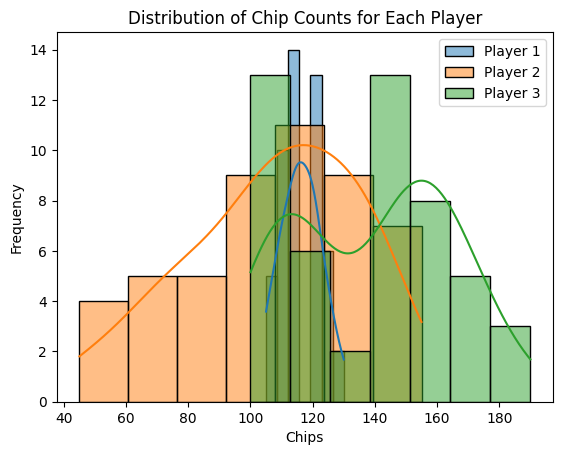

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_chip_distribution(total_chips):
    for player, chips in total_chips.items():
        sns.histplot(chips, kde=True, label=player)

    plt.title("Distribution of Chip Counts for Each Player")
    plt.xlabel("Chips")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Plot the chip distributions after the simulation
plot_chip_distribution(total_chips)
